<a href="https://colab.research.google.com/github/Ishakarn02/CODESOFT/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 81.9MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bank-customer-churn-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
data.shape

(10000, 14)

## **Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **Check Null Values In The Dataset**

In [11]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **Statistics About The Dataset**

In [12]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## **Dropping Irrelevant Features**

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Encoding Categorical Data**

In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
data = pd.get_dummies(data,drop_first=True)


In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

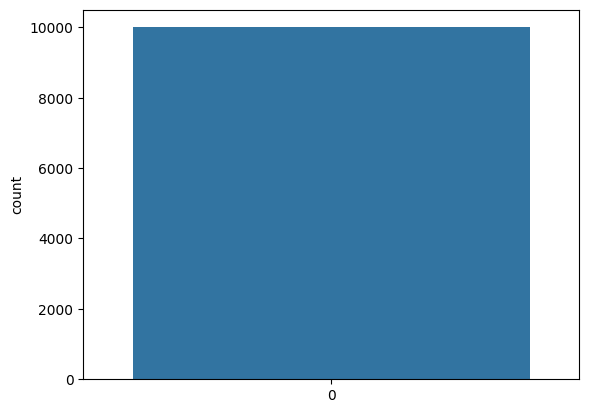

In [20]:
import seaborn as sns
sns.countplot(data['Exited'])

In [21]:
X = data.drop('Exited',axis=1)
y = data['Exited']

## **Handling Imbalanced Data With SMOTE**

In [22]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## **Splitting The Dataset Into The Training Set And Test Set**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

## **Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.23241937, -0.2976743 , -1.02658506, ..., -0.57783366,
        -0.46037838, -0.84047746],
       [ 1.09809695,  0.1045712 , -1.39553941, ..., -0.57783366,
        -0.46037838,  1.18979991],
       [-0.90720681,  0.70793944, -0.28867637, ..., -0.57783366,
        -0.46037838, -0.84047746],
       ...,
       [ 0.19954554,  0.20513257,  1.18714102, ..., -0.57783366,
        -0.46037838,  1.18979991],
       [ 0.70361097, -1.20272666,  0.08027798, ..., -0.57783366,
        -0.46037838, -0.84047746],
       [ 0.52828386,  1.00962356, -1.39553941, ...,  1.73060185,
        -0.46037838,  1.18979991]])

## **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7818581293157565

In [27]:
accuracy_score(y_test,y_pred1)

0.7818581293157565

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred1)

0.7701511335012594

In [29]:
recall_score(y_test,y_pred1)

0.7875080489375402

In [30]:
f1_score(y_test,y_pred1)

0.778732887615409

## **SVC**

In [31]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [32]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8298807281858129

In [33]:
precision_score(y_test,y_pred2)

0.831041257367387

## **KNeighbors Classifier**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8148148148148148

In [36]:
precision_score(y_test,y_pred3)

0.8

## **Decision Tree Classifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7919020715630886

In [39]:
precision_score(y_test,y_pred4)

0.7736777367773677

## **Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8534212178279975

In [42]:
precision_score(y_test,y_pred5)

0.8449809402795425

## **Gradient Boosting Classifier**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [44]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8355304456999372

In [45]:
precision_score(y_test,y_pred6)

0.8400528750826173

In [46]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})
final_data

,Models,ACC
0,LR,0.781858
1,SVC,0.829881
2,KNN,0.814815
3,DT,0.791902
4,RF,0.853421
5,GBC,0.835530


In [47]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

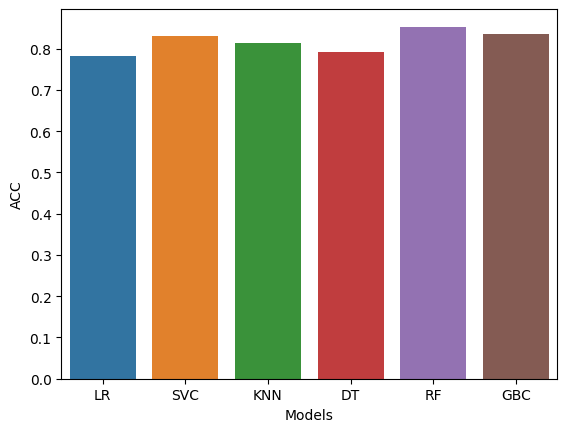

In [48]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

## **Save The Model**

In [49]:
X_res=sc.fit_transform(X_res)
rf.fit(X_res,y_res)

RandomForestClassifier()

In [50]:
import joblib
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [51]:
model = joblib.load('churn_predict_model')

In [52]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [53]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

## **GUI**

In [55]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [60]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [68]:


def get_user_input():
    p1 = int(input("Enter CreditScore: "))
    p2 = int(input("Enter Age: "))
    p3 = int(input("Enter Tenure: "))
    p4 = float(input("Enter Balance: "))
    p5 = int(input("Enter NumOfProducts: "))
    p6 = int(input("Enter HasCrCard (0 or 1): "))
    p7 = int(input("Enter IsActiveMember (0 or 1): "))
    p8 = float(input("Enter EstimatedSalary: "))
    p9 = int(input("Enter Geography (1 for Germany, 2 for Spain, 3 for France): "))
    if p9 == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    elif p9 == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    elif p9 == 3:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1
    p10 = int(input("Enter Gender (0 for Female, 1 for Male): "))

    return [[p1, p2, p3, p4, p5, p6, p7, p8, Geography_Germany, Geography_Spain, p10]]

def predict_churn(input_data):
    model = joblib.load('churn_predict_model')
    result = model.predict(input_data)

    if result == 0:
        print("No Exit")
    else:
        print("Exit")

user_input = get_user_input()
predict_churn(user_input)

Enter CreditScore: 619
Enter Age: 42
Enter Tenure: 2
Enter Balance: 0
Enter NumOfProducts: 0
Enter HasCrCard (0 or 1): 0
Enter IsActiveMember (0 or 1): 0
Enter EstimatedSalary: 101
Enter Geography (1 for Germany, 2 for Spain, 3 for France): 1
Enter Gender (0 for Female, 1 for Male): 0
No Exit
